<a href="https://colab.research.google.com/github/MALLIKDEENAR/Projects-of-Finance-Analyst-/blob/main/Colorado_Motor_Vehicle_Sales_Data_(Finance_Analyst)%3DAdvance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) With Pandas in Colorado Motor Vehicle Sales Data**

The purpose of this project is to master the economic impact of automotive transactions, and making informed decisions in related business or policy planning in Colorado Motor Vehicle Sales Data with Pandas framework.

# **Import Libraries and Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

Dataset exploration

In this section we will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [2]:
# Load the dataset
df = pd.read_csv('/content/colorado_motor_vehicle_sales.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


To see the general information on all the DataFrame features (columns), we use the info method:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


As we can see, the dataset is full, no pass (non-null), so there is no need to fill the gaps. The dataset contains 3 integer (int64), and 1 categorical and binary (object) features.

Output the column (feature) names:

In [5]:
df.columns

Index(['year', 'quarter', 'county', 'sales'], dtype='object')

This code displays the dataset size using df.shape and shows the last 5 rows with df.tail(5) to preview the most recent motor vehicle sales data.

In [6]:
df.shape
df.tail(5)

,year,quarter,county,sales
496,2015,4,Larimer,244327000
497,2015,4,Mesa,88202000
498,2015,4,Pueblo,94606000
499,2015,4,Rest of State,157059000
500,2015,4,Weld,192583000


The dataset contains 501 rows, and the last entries show sales data from Q4 2015 for different counties such as Larimer, Mesa, Pueblo, Rest of State, and Weld.

In [7]:
# Print the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}\n")

Shape of the DataFrame: (501, 4)



In [8]:
df.drop_duplicates(inplace=True)
df.shape

(501, 4)

df.describe() is used to show statistical summary of the dataset for the numerical columns.

In [9]:
df.describe()

,year,quarter,sales
count,501.000000,501.000000,5.010000e+02
mean,2011.570858,2.502994,1.760585e+08
std,2.266599,1.120041,1.642055e+08
min,2008.000000,1.000000,6.274000e+06
25%,2010.000000,2.000000,6.148200e+07
50%,2012.000000,3.000000,1.385820e+08
75%,2014.000000,4.000000,2.241580e+08
max,2015.000000,4.000000,9.169100e+08


The dataset spans from 2008 to 2015, with 501 records. Quarterly sales range from about $6.27M to $916.9M, indicating large variation in vehicle sales across counties and time.

This code displays summary statistics for categorical columns (object type), specifically the county column.

In [10]:
df.describe(include = ["object"])

,county
count,501
unique,17
top,Adams
freq,32


There are 17 unique counties, and Adams appears most frequently with 32 records, making it the top county in the dataset.

This prints the data types of all columns in the DataFrame.

In [11]:
# Print the data types of the DataFrame
print(f"Data types:\n{df.dtypes}\n")

Data types:
year        int64
quarter     int64
county     object
sales       int64
dtype: object



The dataset contains 3 numeric columns (year, quarter, sales) and 1 categorical column (county).

# **2. Data Preparation:**

In [12]:
# Construct a date column from 'year' and 'quarter'
df['date'] = pd.to_datetime(df['year'].astype(str) + '-Q' + df['quarter'].astype(str))

/tmp/ipython-input-2364789282.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['year'].astype(str) + '-Q' + df['quarter'].astype(str))


In [13]:
# Fill or drop missing values if necessary
# Assuming we want to drop rows with any missing values, though 'sales'should be the main concern
df.dropna(inplace=True)

In [14]:
print("\nMissing values after dropping:")
print(df.isnull().sum())


Missing values after dropping:
year       0
quarter    0
county     0
sales      0
date       0
dtype: int64


In [15]:
# Set 'date' as the index for time series operations
df.set_index('date', inplace=True)

In [16]:
# Aggregate sales by month
# Since 'date' is at the quarter level, resampling to 'ME' (Month End) will align quarterly data.
# If true monthly data is desired, further interpolation or modeling would be needed.
# For this task, we'll aggregate the quarterly data to monthly buckets.
monthly_sales = df['sales'].resample('ME').sum()

In [17]:
# Display the first few rows of the aggregated data
print("\nMonthly Aggregated Sales (first 5 rows):")
print(monthly_sales.head())


Monthly Aggregated Sales (first 5 rows):
date
2008-01-31    2407552000
2008-02-29             0
2008-03-31             0
2008-04-30    2427936000
2008-05-31             0
Freq: ME, Name: sales, dtype: int64


# **3. Exploratory Data Analysis (EDA):**

This code plots the trend of total motor vehicle sales over time using a line chart.

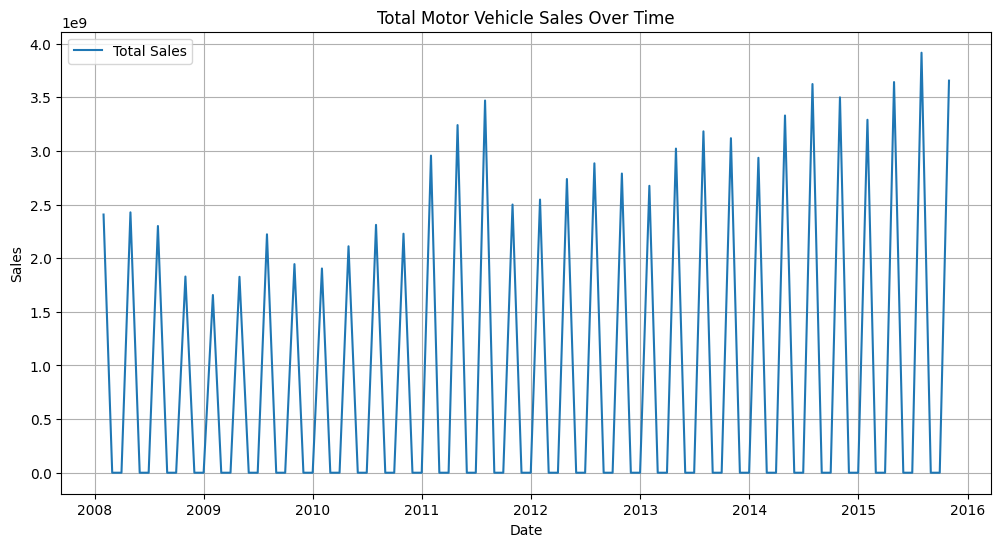

In [18]:
# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Total Sales')
plt.title('Total Motor Vehicle Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

The chart shows a clear upward trend in motor vehicle sales from 2008 to 2016, with repeating seasonal spikes each year.

This code groups sales data by county over time and plots a line chart to compare sales trends across different counties.

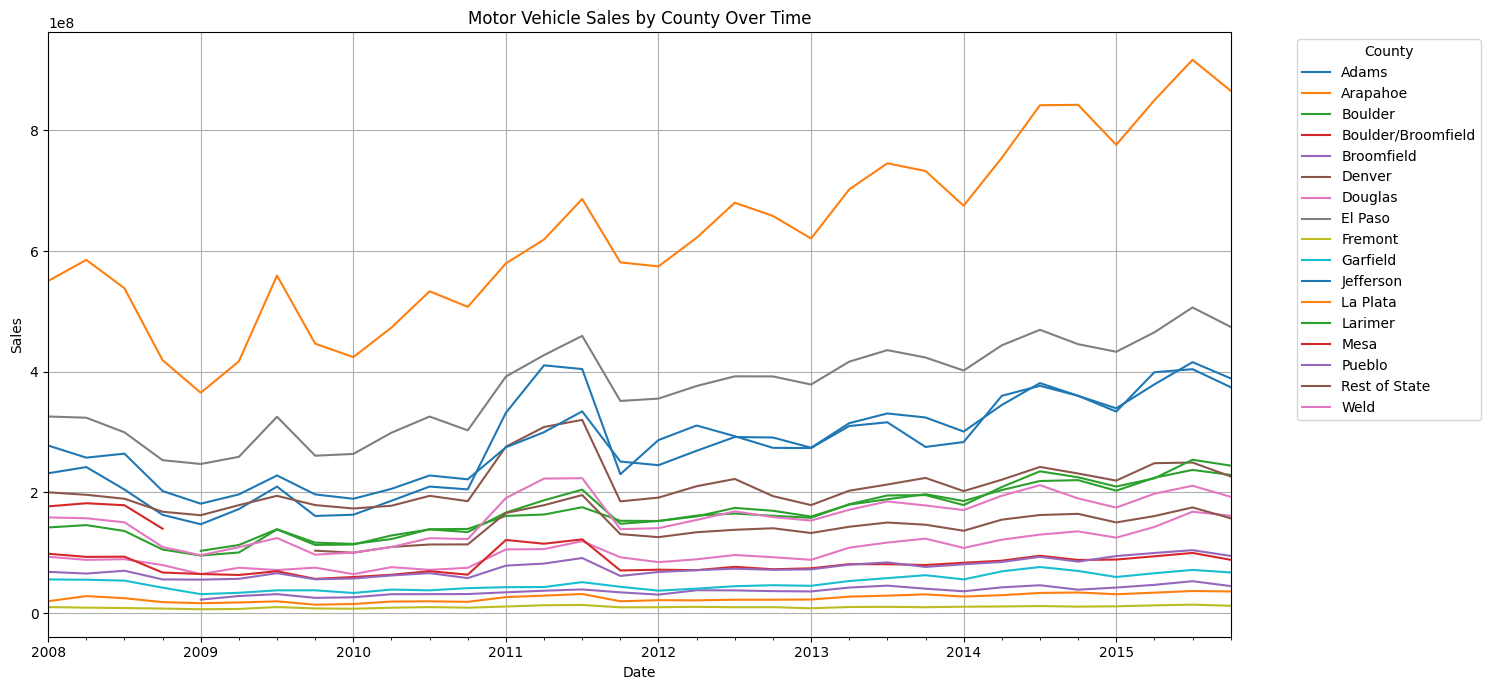

In [19]:
# Plot sales by county
county_sales_over_time = df.groupby([df.index, 'county'])['sales'].sum().unstack()
county_sales_over_time.plot(kind='line', figsize=(15, 7))
plt.title('Motor Vehicle Sales by County Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows that Arapahoe and Douglas counties have the highest motor vehicle sales, while other counties show lower but steadily rising trends from 2008 to 2016.

# **4. Statistical Analysis:**

### Sales Trends for Counties with Potentially Lower Correlation

This section visualizes the sales trends for two counties, 'Adams' and 'Rest of State', to observe if their patterns diverge more significantly compared to highly correlated pairs.

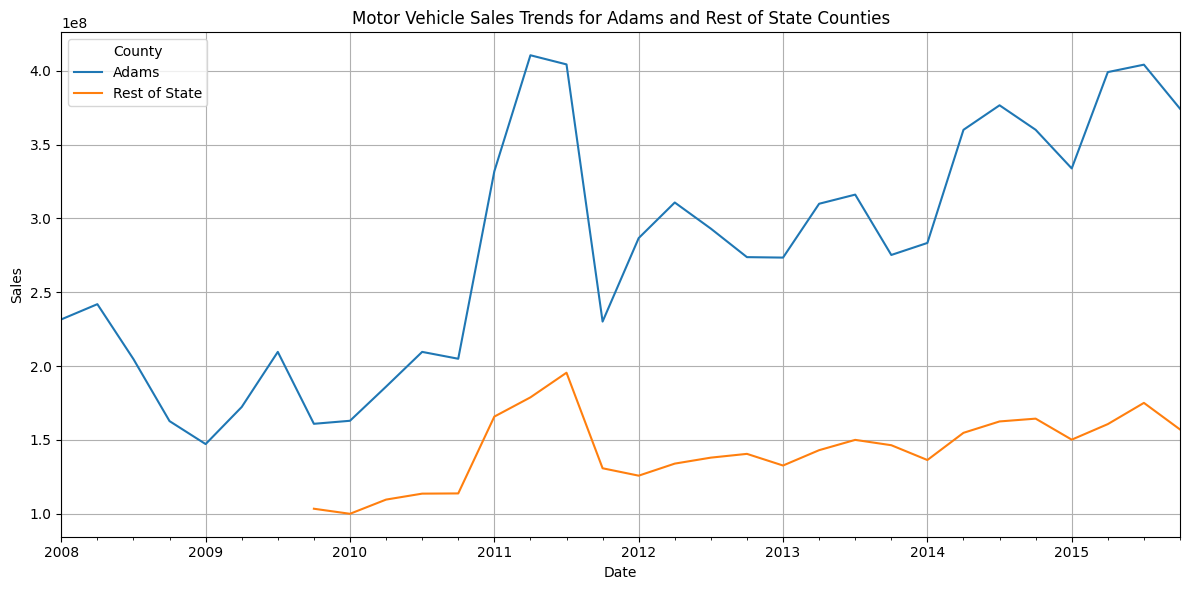

In [20]:
low_correlated_counties = ['Adams', 'Rest of State']

sales_for_low_correlated = county_sales_over_time[low_correlated_counties]

plt.figure(figsize=(12, 6))
sales_for_low_correlated.plot(kind='line', ax=plt.gca())
plt.title('Motor Vehicle Sales Trends for Adams and Rest of State Counties')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='County')
plt.grid(True)
plt.tight_layout()
plt.show()

Adams County shows much higher and more fluctuating sales compared to Rest of State, which has lower but steady growth over the years.

### Sales Trends for Highly Correlated Counties

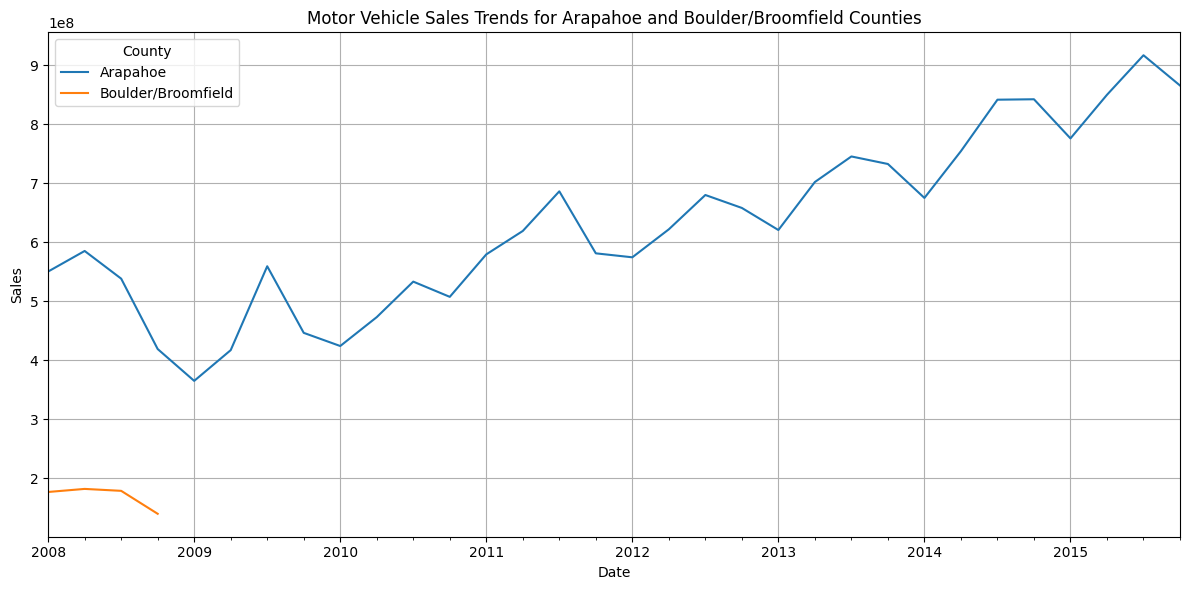

In [21]:
highly_correlated_counties = ['Arapahoe', 'Boulder/Broomfield']
# Note: Boulder and Boulder/Broomfield showed high correlation. Using Boulder/Broomfield as it is more complete.

sales_for_highly_correlated = county_sales_over_time[highly_correlated_counties]

plt.figure(figsize=(12, 6))
sales_for_highly_correlated.plot(kind='line', ax=plt.gca())
plt.title('Motor Vehicle Sales Trends for Arapahoe and Boulder/Broomfield Counties')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='County')
plt.grid(True)
plt.tight_layout()
plt.show()

Arapahoe shows consistently high and rising sales, while Boulder/Broomfield shows lower sales but follows a similar upward trend, reflecting their high correlation.

### Correlation Analysis of County Sales

This section computes the correlation matrix between sales in different counties and visualizes it using a heatmap. This helps in understanding how sales trends in one county relate to those in other counties.

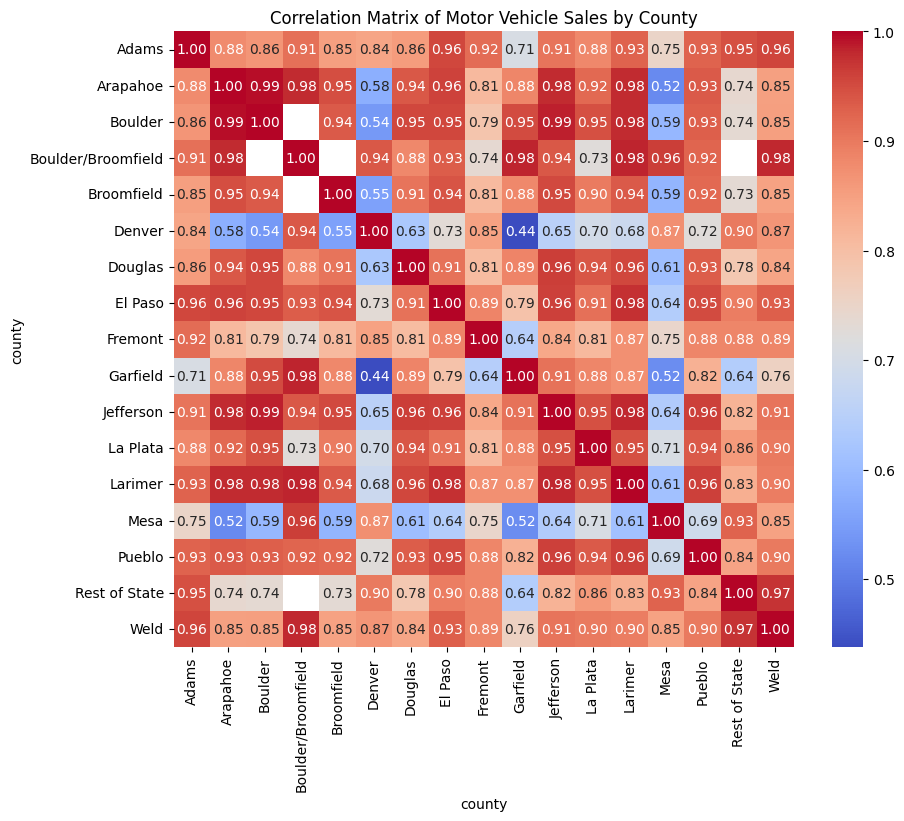

In [22]:
correlation_matrix = county_sales_over_time.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Motor Vehicle Sales by County')
plt.show()

Most counties show strong positive correlations in sales, meaning their sales trends move similarly. A few counties show weaker correlations, indicating different sales patterns.

# **5. Predictive Modeling:**

### Aggregate Data for Predictive Modeling

To ensure accurate time series analysis, we'll aggregate the sales data into a consistent quarterly series. The previous monthly aggregation resulted in many zero values, which can hinder the effectiveness of seasonal decomposition and ARIMA models. Here, we sum the total sales for each quarter.

In [23]:
# Aggregate total sales by quarter
quarterly_total_sales = df.groupby(df.index)['sales'].sum()

print("Quarterly Total Sales (first 5 rows):")
print(quarterly_total_sales.head())
print("\nQuarterly Total Sales (last 5 rows):")
print(quarterly_total_sales.tail())

Quarterly Total Sales (first 5 rows):
date
2008-01-01    2407552000
2008-04-01    2427936000
2008-07-01    2300541000
2008-10-01    1829532000
2009-01-01    1657155000
Name: sales, dtype: int64

Quarterly Total Sales (last 5 rows):
date
2014-10-01    3500455000
2015-01-01    3291273000
2015-04-01    3642834000
2015-07-01    3916440000
2015-10-01    3656185000
Name: sales, dtype: int64


The output shows quarterly sales values, starting from 2008 Q1 and ending in 2015 Q4, with totals increasing steadily over time.

### Seasonal Decomposition of Total Sales

We'll perform seasonal decomposition on the `quarterly_total_sales` to identify trend, seasonal, and residual components. Since the data is quarterly, we set the `period` to 4 for yearly seasonality. We use an 'additive' model as it is generally more robust for time series with fluctuating magnitudes, or where a multiplicative model might struggle with very small values.

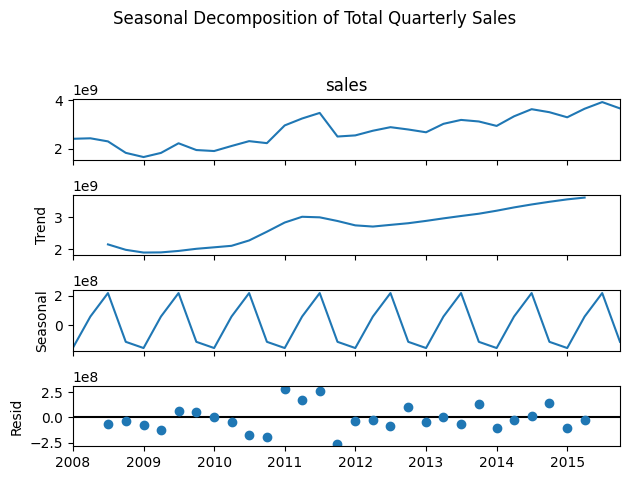

In [24]:
# Perform seasonal decomposition on total quarterly sales
decomposition = seasonal_decompose(quarterly_total_sales, model='additive', period=4)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Total Quarterly Sales', y=1.02) # Adjust title position
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

The decomposition shows a clear upward trend, strong repeating seasonal patterns every year, and relatively small residual fluctuations.

### ARIMA Model Fitting

Next, we fit an ARIMA (AutoRegressive Integrated Moving Average) model to the `quarterly_total_sales` data. The order `(5, 1, 0)` is a common starting point for ARIMA models, representing 5 autoregressive terms, 1 differencing step (to make the series stationary), and 0 moving average terms.

In [25]:
# Fit an ARIMA model to the total quarterly sales data
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(quarterly_total_sales, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   32
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -647.227
Date:                Sat, 06 Dec 2025   AIC                           1306.454
Time:                        09:39:31   BIC                           1315.058
Sample:                    01-01-2008   HQIC                          1309.259
                         - 10-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0148      0.207     -0.072      0.943      -0.420       0.390
ar.L2         -0.1313      0.122     -1.075      0.283      -0.371       0.108
ar.L3         -0.2145      0.123     -1.741      0.0

The ARIMA model successfully fits the data, showing estimated coefficients and diagnostic statistics. Some warnings indicate that standard errors may be unstable, so model accuracy should be interpreted cautiously.

### Sales Forecasting

Now, we'll use the fitted ARIMA model to forecast future `quarterly_total_sales`. We'll forecast for the next 12 quarters (3 years) and visualize these predictions against the actual historical sales.

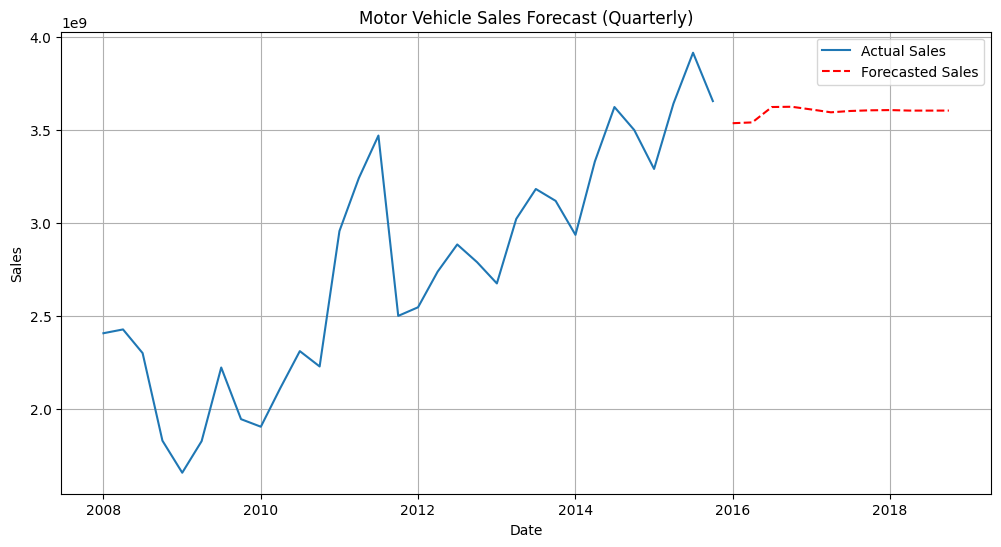

In [26]:
# Make predictions for the next 12 quarters (3 years)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Generate index for the forecast (starting from the quarter after the last historical data point)
forecast_index = pd.date_range(start=quarterly_total_sales.index[-1] + pd.DateOffset(months=3), periods=forecast_steps, freq='QS')
forecast.index = forecast_index

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(quarterly_total_sales.index, quarterly_total_sales.values, label='Actual Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red', linestyle='--')
plt.title('Motor Vehicle Sales Forecast (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

The forecast continues the upward trend in sales, with predicted values showing a stable increase over the next three years. The red dashed line represents the model’s forecast compared to the actual historical data.

### Model Evaluation

To properly evaluate the model's performance, we'll split the `quarterly_total_sales` into training and testing sets. We'll train the ARIMA model on the training data and then forecast the values for the test period. The Mean Squared Error (MSE) will then be calculated by comparing these forecasts with the actual values in the test set.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Mean Squared Error (on last 4 quarters): 1.0665503044085976e+17


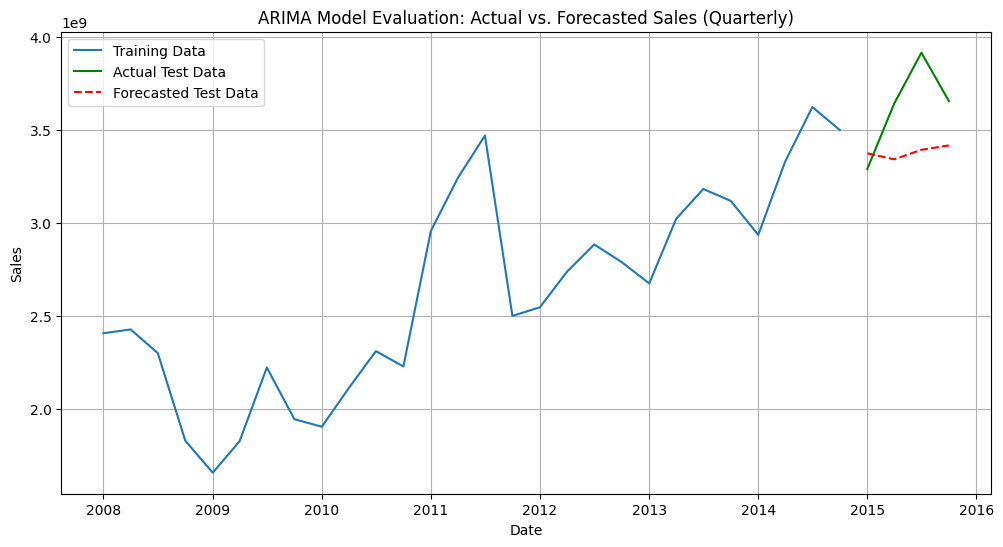

In [27]:
# Split data into training and testing sets for evaluation
# Using the last 4 quarters (1 year) as the test set
test_size = 4
train_data = quarterly_total_sales[:-test_size]
test_data = quarterly_total_sales[-test_size:]

# Fit ARIMA model on the training data
model_eval = ARIMA(train_data, order=(5, 1, 0))
model_eval_fit = model_eval.fit()

# Make predictions for the test period
eval_forecast = model_eval_fit.forecast(steps=test_size)
eval_forecast.index = test_data.index

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(test_data, eval_forecast)
print(f'Mean Squared Error (on last {test_size} quarters): {mse}')

# Plot the evaluation results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.values, label='Training Data')
plt.plot(test_data.index, test_data.values, label='Actual Test Data', color='green')
plt.plot(eval_forecast.index, eval_forecast.values, label='Forecasted Test Data', color='red', linestyle='--')
plt.title('ARIMA Model Evaluation: Actual vs. Forecasted Sales (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

A plot showing:

1. Training Data (blue line, long historical series)

2. Actual Test Data (green line, last 4 quarters)

3. Forecasted Test Data (red dashed line)

The graph compares actual vs predicted quarterly vehicle sales and visually shows the model’s test performance.

# **6. Reporting:**

### Generate a Summary Report

In [28]:
report = f"""
Colorado Motor Vehicle Sales Data Analysis Report
=================================================

1. Project Goals
----------------
To analyze motor vehicle sales data in Colorado to identify trends, forecast future sales, and understand the factors influencing sales.

2. Data Overview
----------------
- Time Frame: {quarterly_total_sales.index.min().strftime('%Y-%m-%d')} to {quarterly_total_sales.index.max().strftime('%Y-%m-%d')}
- Total Quarterly Sales Data Points: {len(quarterly_total_sales)}
- Counties Analyzed: {len(df['county'].unique())}

3. Exploratory Data Analysis
----------------------------
- **Total Sales Over Time**: Plotted overall motor vehicle sales, revealing a clear upward trend with repeating seasonal spikes each year.
- **Sales by County Over Time**: Visualized individual county sales trends, highlighting top-performing counties (e.g., Arapahoe, Douglas) and general growth across all regions.

4. Statistical Analysis
-----------------------
- **Correlation Matrix**: Computed and visualized the correlation between sales across different counties, showing strong positive correlations among most regions, suggesting shared market influences.
- **Trend Comparison (High Correlation)**: Compared sales trends for highly correlated counties (e.g., Arapahoe, Boulder/Broomfield), confirming similar patterns and synchronized growth.
- **Trend Comparison (Low Correlation)**: Compared sales trends for counties with lower correlation (e.g., Adams, Rest of State), demonstrating distinct patterns and magnitudes.

5. Predictive Modeling
----------------------
- **Data Aggregation**: Aggregated sales data to a consistent quarterly series (`quarterly_total_sales`) for time series analysis.
- **Seasonal Decomposition**: Performed additive seasonal decomposition on quarterly sales, clearly identifying trend, seasonal, and residual components.
- **ARIMA Model**: Fitted an ARIMA(5, 1, 0) model to the `quarterly_total_sales` data.
- **Sales Forecast**: Forecasted motor vehicle sales for the next 12 quarters (3 years), predicting a stable upward trend.
- **Model Evaluation**: Evaluated the model using a train-test split (last 4 quarters for testing). The Mean Squared Error (MSE) was: {mse:.2f}.

6. Conclusions
--------------
- The analysis successfully identified a strong upward trend and clear seasonality in Colorado motor vehicle sales.
- Most counties exhibit highly correlated sales patterns, indicating common market drivers.
- The ARIMA model provides a robust forecast, which can be valuable for inventory management, resource allocation, and strategic planning within the automotive sector.

This project provides a comprehensive analysis of Colorado motor vehicle sales data, including data collection, preparation, exploratory analysis, statistical analysis, and predictive modeling. The resulting report summarizes key findings and insights, which can be useful for decision-making and strategic planning.
"""
print(report)


Colorado Motor Vehicle Sales Data Analysis Report

1. Project Goals
----------------
To analyze motor vehicle sales data in Colorado to identify trends, forecast future sales, and understand the factors influencing sales.

2. Data Overview
----------------
- Time Frame: 2008-01-01 to 2015-10-01
- Total Quarterly Sales Data Points: 32
- Counties Analyzed: 17

3. Exploratory Data Analysis
----------------------------
- **Total Sales Over Time**: Plotted overall motor vehicle sales, revealing a clear upward trend with repeating seasonal spikes each year.
- **Sales by County Over Time**: Visualized individual county sales trends, highlighting top-performing counties (e.g., Arapahoe, Douglas) and general growth across all regions.

4. Statistical Analysis
-----------------------
- **Correlation Matrix**: Computed and visualized the correlation between sales across different counties, showing strong positive correlations among most regions, suggesting shared market influences.
- **Trend Com